In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import seaborn as sns

### Data Collection

In [2]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module5_exercise_train.csv')
download_file(test_data_url, 'module5_exercise_test.csv')

Downloaded module5_exercise_train.csv from https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_train.csv
Downloaded module5_exercise_test.csv from https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_test.csv


In [3]:
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")
df_test =  pd.read_csv("module5_exercise_test.csv", sep=",")
df_train

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,Rainy,62.701614,6.83 m/s,Moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,Snowy,60.375001,5.79 m/s,Moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN,296.270989
4,2015-01-12,Snowy,NaN,25.14 km/h,High,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098,323.498090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,2019-12-28,Sunny,67.220123,18.33 km/h,High,3.209205,2.508606,2.195577,NaN,NaN,3.236547,3.181473,3.094390,NaN,3.475638,254.061886
1905,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,266.231273
1906,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,266.231273
1907,2019-12-30,Cloudy,65.877214,7.67 m/s,Moderate,NaN,0.700484,NaN,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,NaN,296.431897


In [4]:
df_test

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10
0,2019-01-01,Rainy,72.985535,5.83 km/h,High,NaN,2.041746,1.992639,2.821712,1.636189,2.795024,1.674621,2.832348,2.058945,2.022864
1,2019-01-02,Snowy,70.869436,1.30 m/s,Moderate,1.764737,1.883483,1.791074,1.345804,2.136792,NaN,NaN,1.628191,1.873431,1.329898
2,2019-01-03,Cloudy,64.788216,0.21 m/s,Moderate,3.577973,3.311595,3.873189,3.324726,3.620829,3.380151,3.277014,3.370558,NaN,3.302191
3,2019-01-04,Cloudy,63.144525,0.00 m/s,High,3.098592,2.863002,3.308336,NaN,3.124391,3.385149,2.976644,2.638640,3.079406,3.062108
4,2019-01-05,Snowy,69.346089,4.01 km/h,Moderate,-0.118532,-0.288575,0.600495,-0.081421,0.455634,-0.489217,0.611884,0.367237,-0.244052,-0.297963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,Snowy,71.521673,22.78 km/h,Moderate,-1.674798,-2.338987,-1.829170,-0.881428,-0.571347,-2.231680,-1.962735,-1.602805,-1.264779,-1.705180
361,2019-12-28,Sunny,67.220123,18.33 km/h,High,3.209205,2.508606,2.195577,NaN,NaN,3.236547,3.181473,3.094390,NaN,3.475638
362,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333
363,2019-12-30,Cloudy,65.877214,7.67 m/s,Moderate,NaN,0.700484,NaN,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,NaN


In [5]:
print(df_train.info(),df_train.nunique())
df_test.info(),df_test.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       1909 non-null   object 
 1   weather_condition          1885 non-null   object 
 2   humidity                   1813 non-null   float64
 3   wind_speed                 1819 non-null   object 
 4   oil_brent_price_indicator  1909 non-null   object 
 5   temperature_station1       1624 non-null   float64
 6   temperature_station2       1634 non-null   float64
 7   temperature_station3       1620 non-null   float64
 8   temperature_station4       1632 non-null   float64
 9   temperature_station5       1630 non-null   float64
 10  temperature_station6       1636 non-null   float64
 11  temperature_station7       1601 non-null   float64
 12  temperature_station8       1627 non-null   float64
 13  temperature_station9       1621 non-null   float

(None,
 date                         365
 weather_condition              4
 humidity                     352
 wind_speed                   311
 oil_brent_price_indicator      5
 temperature_station1         306
 temperature_station2         312
 temperature_station3         314
 temperature_station4         322
 temperature_station5         307
 temperature_station6         317
 temperature_station7         312
 temperature_station8         311
 temperature_station9         303
 temperature_station10        314
 dtype: int64)

### Data analysis

#### Make a complete analysis on data preprocessing
# Inconsistencies
# Duplicates (data.duplicated().sum())
# Missing values (data.isnull().sum())
# Categorical
# Outliers
# Feature Engineering
# Feature Selection and/or Dimensionality Reduction

In [6]:
data = pd.concat([df_train, df_test], axis=0)

In [7]:
df_train.shape

(1909, 16)

In [8]:
df_test.shape

(365, 15)

In [9]:
print(data.shape)
data

(2274, 16)


,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,Rainy,62.701614,6.83 m/s,Moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,Snowy,60.375001,5.79 m/s,Moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN,296.270989
4,2015-01-12,Snowy,NaN,25.14 km/h,High,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098,323.498090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,Snowy,71.521673,22.78 km/h,Moderate,-1.674798,-2.338987,-1.829170,-0.881428,-0.571347,-2.231680,-1.962735,-1.602805,-1.264779,-1.705180,NaN
361,2019-12-28,Sunny,67.220123,18.33 km/h,High,3.209205,2.508606,2.195577,NaN,NaN,3.236547,3.181473,3.094390,NaN,3.475638,NaN
362,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,NaN
363,2019-12-30,Cloudy,65.877214,7.67 m/s,Moderate,NaN,0.700484,NaN,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,NaN,NaN


In [10]:
#print(data.info())
print(data.nunique)

<bound method DataFrame.nunique of            date weather_condition   humidity  wind_speed  \
0    2015-01-08            Cloudy  69.304377  27.74 km/h   
1    2015-01-09             Sunny  55.955975  21.78 km/h   
2    2015-01-10             Rainy  62.701614    6.83 m/s   
3    2015-01-11             Snowy  60.375001    5.79 m/s   
4    2015-01-12             Snowy        NaN  25.14 km/h   
..          ...               ...        ...         ...   
360  2019-12-27             Snowy  71.521673  22.78 km/h   
361  2019-12-28             Sunny  67.220123  18.33 km/h   
362  2019-12-29             Rainy  68.085227    7.24 m/s   
363  2019-12-30            Cloudy  65.877214    7.67 m/s   
364  2019-12-31            Cloudy  62.344026  30.99 km/h   

    oil_brent_price_indicator  temperature_station1  temperature_station2  \
0                    Moderate              0.369411                   NaN   
1                    Moderate              2.009903                   NaN   
2            

# Inconsistencies

In [11]:
data['weather_condition'] = data['weather_condition'].str.lower().str.strip()
data['oil_brent_price_indicator'] = data['oil_brent_price_indicator'].str.lower().str.strip()
data.head()

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,cloudy,69.304377,27.74 km/h,moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,sunny,55.955975,21.78 km/h,moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,rainy,62.701614,6.83 m/s,moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,snowy,60.375001,5.79 m/s,moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN,296.270989
4,2015-01-12,snowy,NaN,25.14 km/h,high,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098,323.498090


# Duplicates (data.duplicated().sum())

In [12]:
print(f"Dates dupliquées : {data.duplicated().sum()}")

Dates dupliquées : 90


In [13]:
data=data.drop_duplicates(subset=['date'], keep='last')
print(f"Dates dupliquées : {data.duplicated().sum()}")
data

Dates dupliquées : 0


,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,cloudy,69.304377,27.74 km/h,moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,sunny,55.955975,21.78 km/h,moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,rainy,62.701614,6.83 m/s,moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,snowy,60.375001,5.79 m/s,moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN,296.270989
4,2015-01-12,snowy,NaN,25.14 km/h,high,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098,323.498090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,snowy,71.521673,22.78 km/h,moderate,-1.674798,-2.338987,-1.829170,-0.881428,-0.571347,-2.231680,-1.962735,-1.602805,-1.264779,-1.705180,NaN
361,2019-12-28,sunny,67.220123,18.33 km/h,high,3.209205,2.508606,2.195577,NaN,NaN,3.236547,3.181473,3.094390,NaN,3.475638,NaN
362,2019-12-29,rainy,68.085227,7.24 m/s,moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,NaN
363,2019-12-30,cloudy,65.877214,7.67 m/s,moderate,NaN,0.700484,NaN,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,NaN,NaN


In [14]:
def plot_feature_over_time(df, feature, date_id_start, date_id_end):
    df_filtered = df[(df['date'] >= date_id_start) & (df['date'] <= date_id_end)]
    
    if feature not in df_filtered.columns:
        print(f"Feature '{feature}' not found in the DataFrame.")
        return
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['date'], df_filtered[feature], label=feature, linestyle='-')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.title(f'{feature} from {date_id_start} to {date_id_end}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



# Missing values (data.isnull().sum())

DataFrame head:
         date weather_condition   humidity  wind_speed  \
0  2015-01-08            cloudy  69.304377  27.74 km/h   
1  2015-01-09             sunny  55.955975  21.78 km/h   
2  2015-01-10             rainy  62.701614    6.83 m/s   
3  2015-01-11             snowy  60.375001    5.79 m/s   
4  2015-01-12             snowy        NaN  25.14 km/h   

  oil_brent_price_indicator  temperature_station1  temperature_station2  \
0                  moderate              0.369411                   NaN   
1                  moderate              2.009903                   NaN   
2                  moderate             -2.603544             -2.422001   
3                  moderate             -3.789836             -3.974054   
4                      high             -2.405522             -2.161129   

   temperature_station3  temperature_station4  temperature_station5  \
0              0.159977              0.118224             -0.444455   
1              1.617242                   

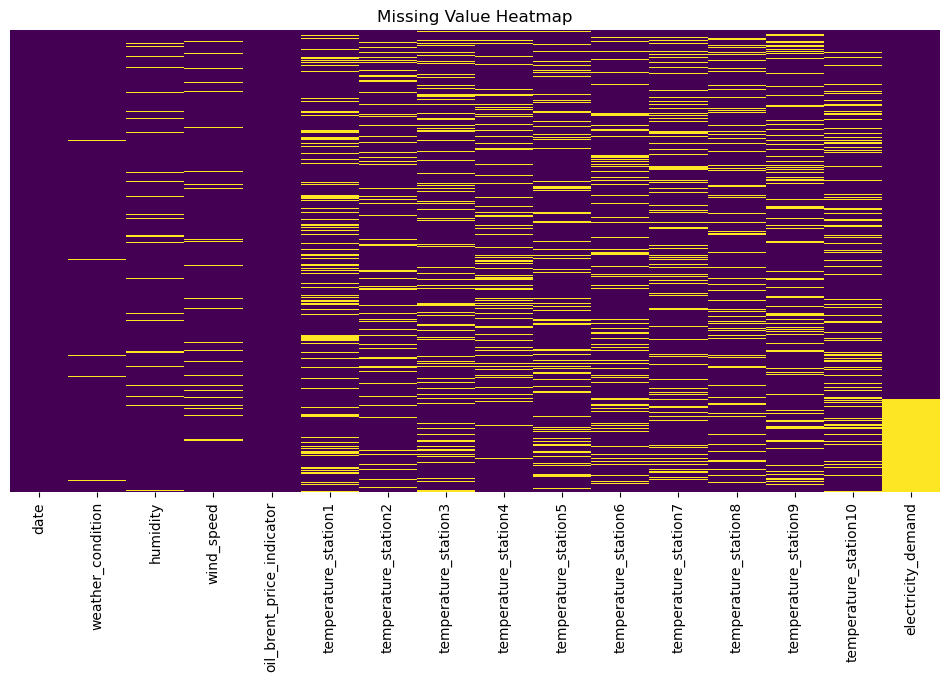

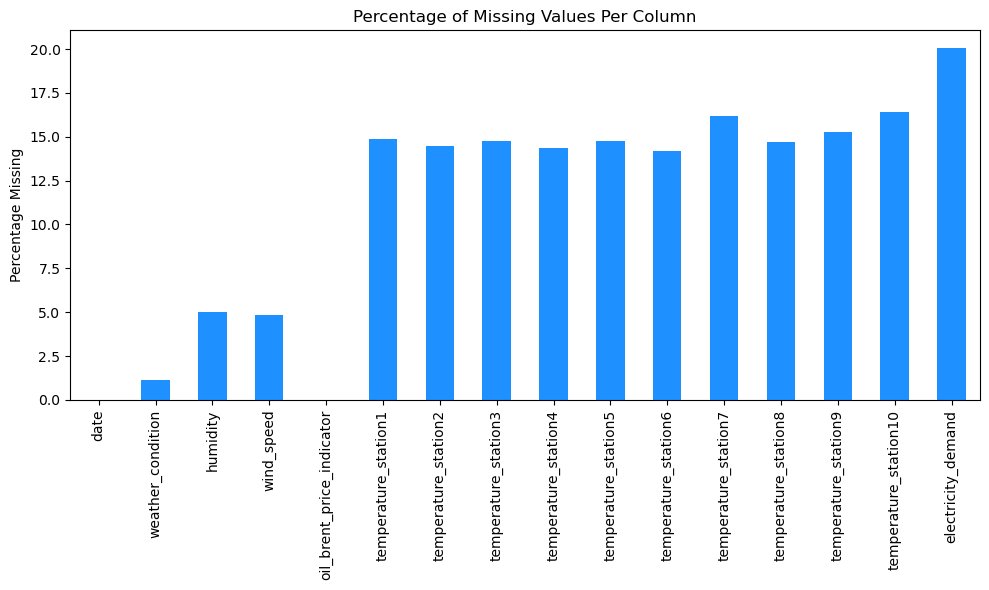


Correlation between missingness and target variable:
weather_condition: 0.0027
humidity: 0.0064
wind_speed: 0.0058
temperature_station1: 0.0112
temperature_station2: 0.0107
temperature_station3: 0.0106
temperature_station4: 0.0110
temperature_station5: 0.0109
temperature_station6: 0.0105
temperature_station7: -0.0587
temperature_station8: 0.0112
temperature_station9: 0.0112
temperature_station10: 0.0118


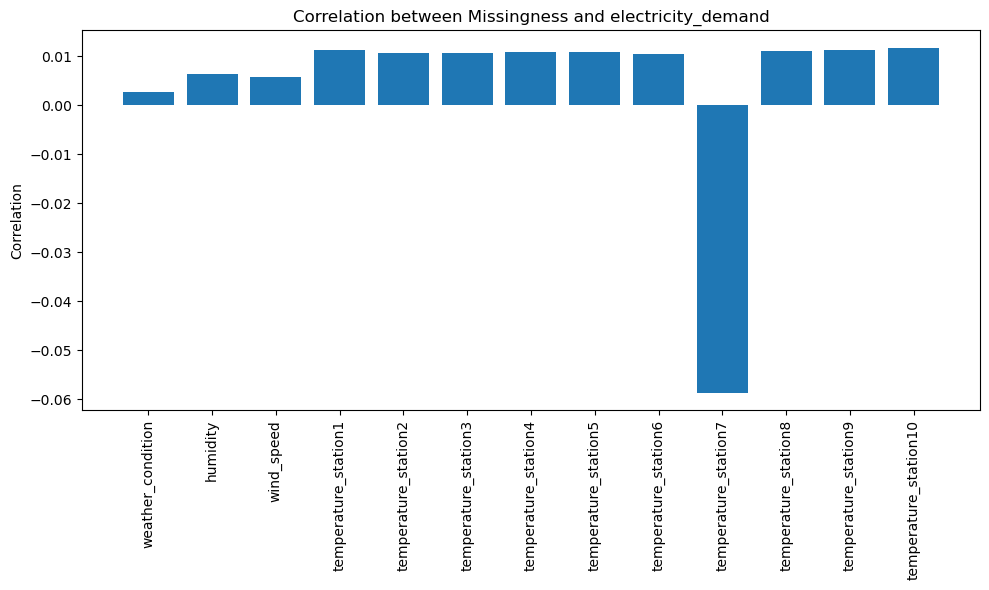

In [15]:
def analyze_missing_data(df, target_column='electricity_demand'):
    # Print the first few rows of the DataFrame to understand its structure
    print("DataFrame head:")
    print(df.head())

    # Basic info about the dataset
    print("\nDataFrame info:")
    df.info()

    # Summarize missing values per column
    print("\nMissing values per column:")
    missing_data = df.isnull().sum()
    print(missing_data)

    # Percentage of missing values per column
    print("\nPercentage of missing values per column:")
    percent_missing = df.isnull().mean() * 100
    print(percent_missing)

    # Visualizing missing values
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Missing Value Heatmap')
    plt.show()

    # Visualizing percentage of missing values
    plt.figure(figsize=(10, 6))
    percent_missing.plot(kind='bar', color='dodgerblue')
    plt.title('Percentage of Missing Values Per Column')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Compute correlation between missingness and target variable
    missingness_correlation = {}
    for column in df.columns:
        if column != target_column and df[column].isnull().sum() > 0:
            correlation = df[column].isnull().corr(df[target_column])
            missingness_correlation[column] = correlation

    print("\nCorrelation between missingness and target variable:")
    for column, correlation in missingness_correlation.items():
        print(f"{column}: {correlation:.4f}")

    # Visualize correlation between missingness and target variable
    plt.figure(figsize=(10, 6))
    plt.bar(missingness_correlation.keys(), missingness_correlation.values())
    plt.title(f'Correlation between Missingness and {target_column}')
    plt.ylabel('Correlation')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Run the analysis
analyze_missing_data(data)

In [16]:
data['date'] = pd.to_datetime(data['date'])

C:\Users\bobigny ash 3\AppData\Local\Temp\ipykernel_95724\736794659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])


In [17]:
data["humidity"] = data["humidity"].interpolate(method="linear")
data  = data.ffill().bfill() # Timeserie stamp
data

C:\Users\bobigny ash 3\AppData\Local\Temp\ipykernel_95724\3365543472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["humidity"] = data["humidity"].interpolate(method="linear")


,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,cloudy,69.304377,27.74 km/h,moderate,0.369411,-2.422001,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,sunny,55.955975,21.78 km/h,moderate,2.009903,-2.422001,1.617242,0.118224,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,rainy,62.701614,6.83 m/s,moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,snowy,60.375001,5.79 m/s,moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,-2.770883,296.270989
4,2015-01-12,snowy,59.512418,25.14 km/h,high,-2.405522,-2.161129,-2.880773,-2.587199,-3.375188,-3.650454,-5.004991,-3.233724,-2.790422,-2.033098,323.498090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,snowy,71.521673,22.78 km/h,moderate,-1.674798,-2.338987,-1.829170,-0.881428,-0.571347,-2.231680,-1.962735,-1.602805,-1.264779,-1.705180,331.221448
361,2019-12-28,sunny,67.220123,18.33 km/h,high,3.209205,2.508606,2.195577,-0.881428,-0.571347,3.236547,3.181473,3.094390,-1.264779,3.475638,331.221448
362,2019-12-29,rainy,68.085227,7.24 m/s,moderate,3.688132,3.919479,2.195577,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,331.221448
363,2019-12-30,cloudy,65.877214,7.67 m/s,moderate,3.688132,0.700484,2.195577,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,4.070333,331.221448


In [18]:
data['wind_speed']

0      27.74 km/h
1      21.78 km/h
2        6.83 m/s
3        5.79 m/s
4      25.14 km/h
          ...    
360    22.78 km/h
361    18.33 km/h
362      7.24 m/s
363      7.67 m/s
364    30.99 km/h
Name: wind_speed, Length: 1819, dtype: object

# Categorical

In [19]:
# Identify unique values
print("Unique values in each column:")
columns = ["weather_condition", "oil_brent_price_indicator"]
for column in columns:
    print(f"{column}: {data[column].nunique()} - {data[column].unique()}")

Unique values in each column:
weather_condition: 4 - ['cloudy' 'sunny' 'rainy' 'snowy']
oil_brent_price_indicator: 5 - ['moderate' 'high' 'low' 'very low' 'very high']


In [20]:
#data['weather_condition']= pd.Categorical(data['weather_condition'] categories=['snowy','rainy','cloudy', 'sunny'], ordered=True)
data['oil_brent_price_indicator'] = pd.Categorical(data['oil_brent_price_indicator'], categories=['very low','low','moderate','high','very high'], ordered=True)
data

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,cloudy,69.304377,27.74 km/h,moderate,0.369411,-2.422001,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,sunny,55.955975,21.78 km/h,moderate,2.009903,-2.422001,1.617242,0.118224,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,rainy,62.701614,6.83 m/s,moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,snowy,60.375001,5.79 m/s,moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,-2.770883,296.270989
4,2015-01-12,snowy,59.512418,25.14 km/h,high,-2.405522,-2.161129,-2.880773,-2.587199,-3.375188,-3.650454,-5.004991,-3.233724,-2.790422,-2.033098,323.498090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,snowy,71.521673,22.78 km/h,moderate,-1.674798,-2.338987,-1.829170,-0.881428,-0.571347,-2.231680,-1.962735,-1.602805,-1.264779,-1.705180,331.221448
361,2019-12-28,sunny,67.220123,18.33 km/h,high,3.209205,2.508606,2.195577,-0.881428,-0.571347,3.236547,3.181473,3.094390,-1.264779,3.475638,331.221448
362,2019-12-29,rainy,68.085227,7.24 m/s,moderate,3.688132,3.919479,2.195577,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,331.221448
363,2019-12-30,cloudy,65.877214,7.67 m/s,moderate,3.688132,0.700484,2.195577,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,4.070333,331.221448


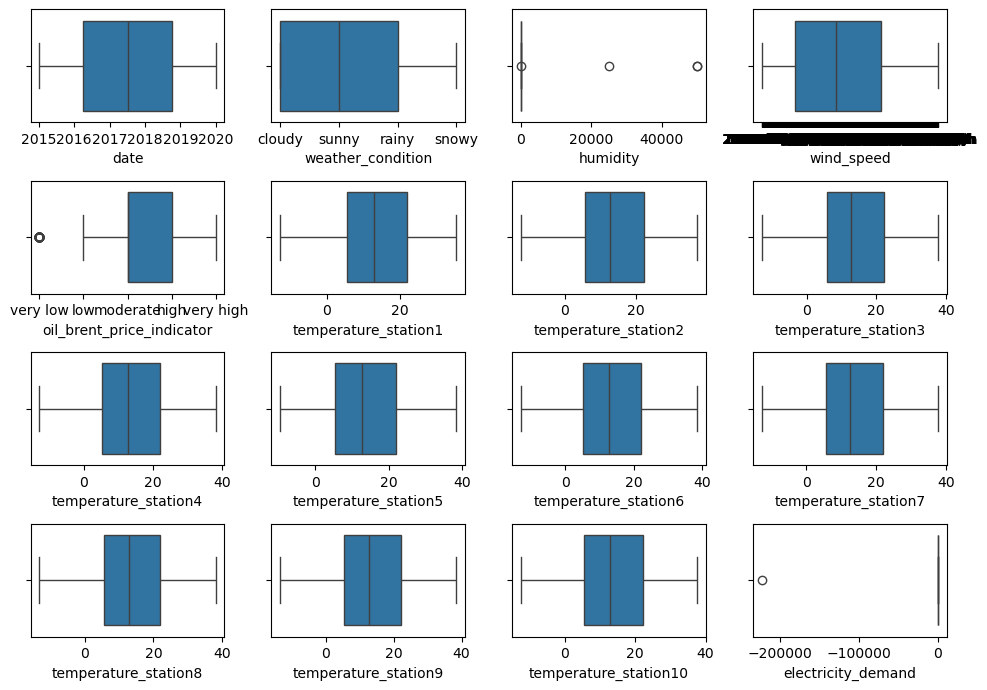

In [21]:
# Outliers

plt.figure(figsize=(10, 10))

for i in range(data.shape[1]):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(x=data.iloc[:, i])
plt.tight_layout()
plt.show()

In [22]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outliers = detect_outliers_iqr(data['humidity'])
print(outliers)
outliers = detect_outliers_iqr(data['electricity_demand'])
print("\n", outliers)

181        32.814149
1021    25037.315797
1022    50000.000000
1509    50000.000000
Name: humidity, dtype: float64

 1029   -223288.771683
Name: electricity_demand, dtype: float64


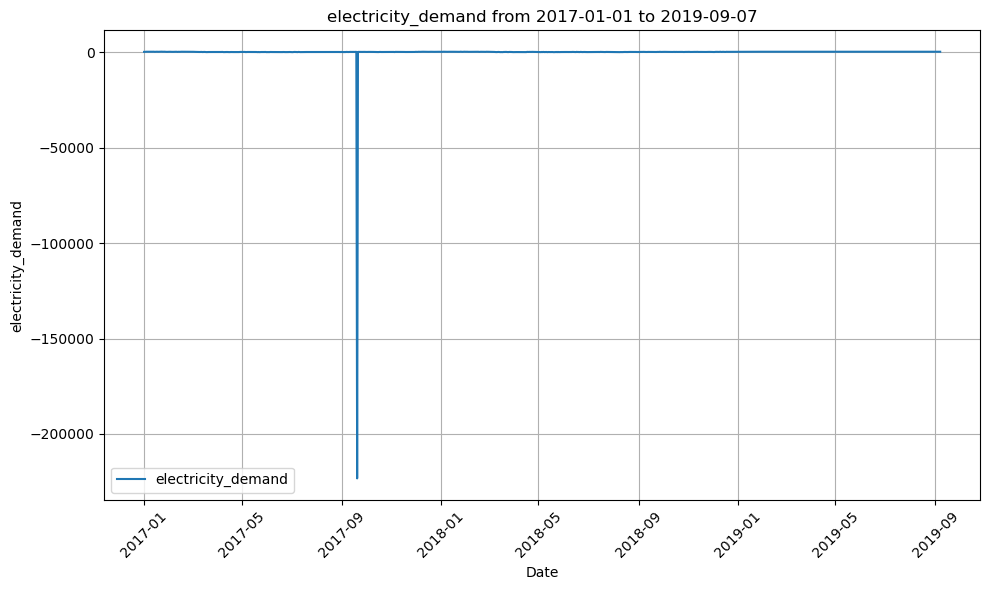

In [23]:
plot_feature_over_time(data, 'electricity_demand', '2017-01-01', '2019-09-07')

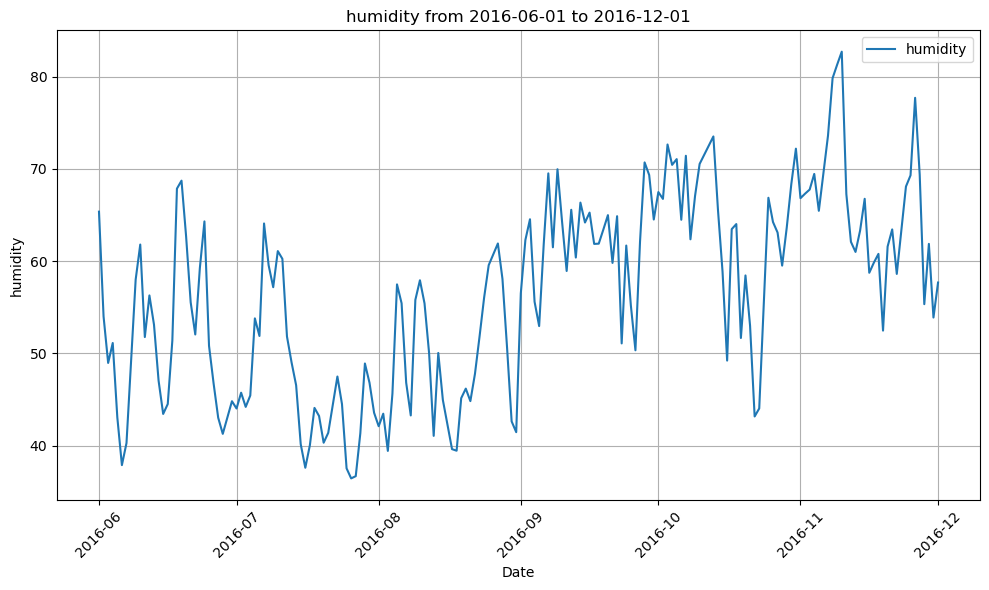

In [24]:
plot_feature_over_time(data, 'humidity', '2016-06-01', '2016-12-01')

### Data Preprocessing Evaluation Strategy

In [25]:
# Provide a complete data preprocessing transformations

In [26]:
# 1. Handle Inconsistencies
def handle_inconsistencies(X_train, y_train, X_val=None):
    X_train = X_train.copy()
    # fonction pour m/s ->km/h
    def handle_wind(x):
        wind = str(x).split(' ')
        if wind[-1] == "km/h":
            value = float(wind[0])
        elif wind[-1] == "m/s":
            value = float(wind[0]) *3.6
        else:
            value = float(wind[0])
        return value

    X_train['wind_speed'] = X_train['wind_speed'].apply(handle_wind)

    if X_val is not None:
        X_val = X_val.copy()

        X_val['wind_speed'] = X_val['wind_speed'].apply(handle_wind)
        return X_train, y_train, X_val
    else:
        return X_train, y_train


# 2. Handling Duplicates
def handle_duplicates(X_train, y_train, X_val=None):
    X_train_clean = X_train.copy()
    y_train_clean = y_train.copy()

    X_train_clean = X_train.drop_duplicates()
    y_train_clean = y_train.loc[X_train_clean.index]

    if X_val is not None:
        X_val_clean = X_val.copy()

        X_val_clean = X_val.drop_duplicates()
        return X_train_clean, y_train_clean, X_val
    else:
        return X_train_clean, y_train_clean

# 3. Handling Missing Values
def handle_missing_values(X_train, y_train, X_val=None):
    X_train = X_train.copy()
    # forwad fill ensuite backward fill pour les valeurs manquantes
    X_train_imputed = X_train.ffill().bfill() 

    if X_val is not None:
        X_val = X_val.copy()

        X_val_imputed = X_val.ffill().bfill()
        return X_train_imputed, X_val_imputed
    else:
        return X_train_imputed


# 4. Handling Categorical Values
def handle_categorical(X_train, y_train, X_val=None):
    mapping = {'Very Low': 0, 'Low': 1, 'Moderate': 2, 'High': 3, 'Very High': 4}
    X_train_encoded = pd.get_dummies(X_train.copy(), columns=['weather_condition'], dummy_na=False)
    X_train_encoded['oil_brent_price_indicator'] = X_train_encoded['oil_brent_price_indicator'].map(mapping)
    if X_val is not None:
        X_val_encoded = pd.get_dummies(X_val.copy(), columns=['weather_condition'], dummy_na=False)
        X_val_encoded['oil_brent_price_indicator'] = X_val_encoded['oil_brent_price_indicator'].map(mapping)
        X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
        return X_train_encoded, X_val_encoded
    else:
        return X_train_encoded

# 5. Handling Outliers
def handle_outliers(X_train, y_train, X_val=None):
    X_train = X_train.copy()

    def impute_outliers(X):
        Q1 = X.quantile(0.25)
        Q3 = X.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        impute_value = X.median()
        data_imputed = X.copy()
        data_imputed[(X < lower_bound) | (X > upper_bound)] = impute_value
        return data_imputed

    X_train['humidity'] = impute_outliers(X_train['humidity']) # outlier dans la colonne humidity
    y_train = impute_outliers(y_train) # df_train['Electricity_demand']
    if X_val is not None:
        X_val = X_val.copy()

        X_val['humidity'] = impute_outliers(X_val['humidity'])
        return X_train, y_train, X_val
    else:
        return X_train, y_train


# 6. Feature Engineering
def feature_engineering(X_train, y_train, X_val=None):
    def datatime(df):
        df['date'] = pd.to_datetime(df['date'])
        df['year'] = df['date'].dt.year
        df['month'] = df['date'].dt.month
        df['day'] = df['date'].dt.day
        df['dayofweek'] = df['date'].dt.dayofweek
        df['dayofmonth'] = df['day'] / df['date'].dt.days_in_month
        df['isweekend'] =df['dayofweek'].isin([5, 6]).astype(int)

        return df
    X_train = datatime(X_train.copy())
    if X_val is not None:
        X_val = datatime(X_val.copy())
        return X_train, y_train, X_val
    else:
        return X_train, y_train

# 7. Feature Selection and Dimensionality Reduction
def feature_selection(X_train, y_train, X_val=None):
    #print(X_train.columns.drop(['date', 'day', 'year','month']))
    #X_train.columns.drop(['date', 'day', 'year','month'])
    #print(X_train.columns.drop(['date', 'day', 'year','month']))
    #selected_columns = X_train.columns.drop(['date', 'day', 'year','month'])
    selected_columns =  X_train.columns.drop(['date', 'day', 'year','month'])
    if X_val is not None:
        return X_train[selected_columns] ,X_val[selected_columns]
    else:
        return X_train[selected_columns]


In [27]:
from xgboost import XGBRegressor
def evaluate_pipeline(X, y, n_splits=5):

    ### call transformations here, if there is no learning and no need to be crossval
    X, y = handle_inconsistencies(X, y)
    X, y = handle_duplicates(X, y)
    X  = handle_missing_values(X, y)
    X= handle_categorical(X, y)
    X, y = handle_outliers(X, y)
    X, y = feature_engineering(X, y)
    X = feature_selection(X, y)
    
    model = LinearRegression()
    #model = XGBRegressor() #  Validation MSE:  436.0203, Max: 541.9537, Min: 379.3908 np.float64(436.0203269697978)
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    train_scores = []
    val_scores = []
    
    for fold, (train_index, val_index) in enumerate(tscv.split(X)):
        print(f"Processing fold {fold + 1}/{n_splits}...")
        
        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index].copy(), X.iloc[val_index].copy()
        y_train, y_val = y.iloc[train_index].copy(), y.iloc[val_index].copy()

        ### call transformations here, if there is learning
        # X_train, y_train, X_val = handle_inconsistencies(X_train, y_train, X_val)
        #X_train, y_train, X_val = handle_duplicates(X_train, y_train, X_val)
        # X_train, X_val = handle_missing_values(X_train, y_train, X_val)
        #X_train, X_val = handle_categorical(X_train, y_train, X_val)
        # X_train, y_train, X_val = handle_outliers(X_train, y_train, X_val)
        #X_train, y_train, X_val = feature_engineering(X_train, y_train, X_val)
        #X_train, X_val = feature_selection(X_train, y_train, X_val)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training set
        y_train_pred = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_scores.append(train_mse)
        
        # Predict on validation set
        y_val_pred = model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_scores.append(val_mse)
        
        print(f"Fold {fold + 1} Train MSE: {train_mse:.4f}, Validation MSE: {val_mse:.4f}")
    
    # Compute mean, max, and min values for train and validation MSE
    mean_train_mse = np.mean(train_scores)
    max_train_mse = np.max(train_scores)
    min_train_mse = np.min(train_scores)
    
    mean_val_mse = np.mean(val_scores)
    max_val_mse = np.max(val_scores)
    min_val_mse = np.min(val_scores)
    
    # Print results
    print("\nTrain MSE:")
    print(f"Mean: {mean_train_mse:.4f}, Max: {max_train_mse:.4f}, Min: {min_train_mse:.4f}")
    
    print("\nValidation MSE:")
    print(f"Mean: {mean_val_mse:.4f}, Max: {max_val_mse:.4f}, Min: {min_val_mse:.4f}")
    
    return mean_val_mse  # Return mean validation MSE as the overall score

In [28]:
# Prepare X and y
X = df_train.copy().drop(columns=['electricity_demand'], axis=1)
y = df_train.copy().pop('electricity_demand')
# Run the evaluation
evaluate_pipeline(X, y) #np.float64(1109.3930508876085)

Processing fold 1/5...
Fold 1 Train MSE: 612.8966, Validation MSE: 1327.7996
Processing fold 2/5...
Fold 2 Train MSE: 880.1613, Validation MSE: 984.6422
Processing fold 3/5...
Fold 3 Train MSE: 868.9014, Validation MSE: 1135.5624
Processing fold 4/5...
Fold 4 Train MSE: 927.0514, Validation MSE: 977.3263
Processing fold 5/5...
Fold 5 Train MSE: 933.3679, Validation MSE: 861.1227

Train MSE:
Mean: 844.4757, Max: 933.3679, Min: 612.8966

Validation MSE:
Mean: 1057.2906, Max: 1327.7996, Min: 861.1227


np.float64(1057.2906397887982)

### Generating Submission File

In [29]:
# Train and submit your results

In [30]:
# Prepare X_train and y_train from your data
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")

X_train = df_train.drop(columns=['electricity_demand'], axis=1)
y_train = df_train['electricity_demand']

X_test =  pd.read_csv("module5_exercise_test.csv", sep=",")

In [31]:
def train_and_predict_to_submit(X_train, y_train, X_test):
    model = LinearRegression()
    
    X_train, y_train, X_test = handle_inconsistencies(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_duplicates(X_train, y_train, X_test)
    X_train, X_test = handle_missing_values(X_train, y_train, X_test)
    X_train, X_test = handle_categorical(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_outliers(X_train, y_train, X_test)
    X_train, y_train, X_test = feature_engineering(X_train, y_train, X_test)
    X_train, X_test = feature_selection(X_train, y_train, X_test)

    # Train the model on the entire training set
    print(f"Training model on entire dataset of shape: {X_train.shape}")
    model.fit(X_train, y_train)
    
    # Predict on the test set
    print(f"Predicting on test dataset of shape: {X_test.shape}")
    y_test_pred = model.predict(X_test)
    
    return y_test_pred

In [32]:
# Call serve_model to train and predict
y_test_pred = train_and_predict_to_submit(X_train, y_train, X_test)

Training model on entire dataset of shape: (1819, 20)
Predicting on test dataset of shape: (365, 20)


In [33]:
# Generating Submission File
submission = pd.DataFrame({
    'date': X_test['date'],
    'electricity_demand': y_test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False, sep=',')
print("Submission file saved as 'submission.csv'.")

Submission file saved as 'submission.csv'.
